# Part-1 Introduction to Spatially enabled DataFrame

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#What-does-&quot;adding-spatial-abilities&quot;-mean?" data-toc-modified-id="What-does-&quot;adding-spatial-abilities&quot;-mean?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What does "adding spatial abilities" mean?</a></span></li><li><span><a href="#Custom-Namespaces" data-toc-modified-id="Custom-Namespaces-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Custom Namespaces</a></span><ul class="toc-item"><li><span><a href="#The-spatial-namespace" data-toc-modified-id="The-spatial-namespace-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>The <code>spatial</code> namespace</a></span></li><li><span><a href="#The-geom-namespace" data-toc-modified-id="The-geom-namespace-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>The <code>geom</code> namespace</a></span></li><li><span><a href="#Importing-namespaces" data-toc-modified-id="Importing-namespaces-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Importing namespaces</a></span></li></ul></li><li><span><a href="#Geometry-Engines" data-toc-modified-id="Geometry-Engines-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Geometry Engines</a></span></li></ul></li><li><span><a href="#Quick-Example" data-toc-modified-id="Quick-Example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Quick Example</a></span><ul class="toc-item"><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get Data</a></span></li><li><span><a href="#Create-a-SeDF" data-toc-modified-id="Create-a-SeDF-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create a SeDF</a></span></li><li><span><a href="#Check-Properties-of-a-SeDF" data-toc-modified-id="Check-Properties-of-a-SeDF-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check Properties of a SeDF</a></span></li><li><span><a href="#Apply-spatial-operations-using-.geom" data-toc-modified-id="Apply-spatial-operations-using-.geom-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Apply spatial operations using <code>.geom</code></a></span><ul class="toc-item"><li><span><a href="#Add-buffers" data-toc-modified-id="Add-buffers-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Add buffers</a></span></li><li><span><a href="#Calculate-distance" data-toc-modified-id="Calculate-distance-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Calculate distance</a></span></li></ul></li><li><span><a href="#Perform-Pandas-Operations-on-a-SeDF" data-toc-modified-id="Perform-Pandas-Operations-on-a-SeDF-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Perform Pandas Operations on a SeDF</a></span></li><li><span><a href="#Plot-on-a-Map" data-toc-modified-id="Plot-on-a-Map-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Plot on a Map</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

A [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) is a fundamental [Pandas](https://pandas.pydata.org/) data structure that represents a rectangular table of data and contains an ordered collection of columns. You can think of it as a spreadsheet or a SQL table where each column has a column name for reference and each row can be accessed by using row numbers. 

The [__Spatially enabled DataFrame__](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#geoaccessor) (__SeDF__) adds _"spatial abilities"_ into the popular Pandas DataFrame by inserting a custom namespace called `spatial`. This namespace (also known as accessor) allows us to use Pandas operations on both the non-spatial and spatial columns. With SeDF, you can now easily manipulate geometric and other attribute data.

The SeDF is based on data structures inherently suited to data analysis, with natural operations for the filtering and inspection of subsets of values which are fundamental to statistical and geographic manipulations.

<div class="alert alert-info">
    <b>Note:</b> Spatial Data Engineering using SeDF builds on top of core Data Engineering concepts in Python. If you are new to Pandas, NumPy and related libraries, we recommend you start with the <a href="https://developers.arcgis.com/python/guide/part1-introduction-to-dataengineering/">Introduction to Data Engineering</a> guide series and then come here.
</div>

### What does "adding spatial abilities" mean?

Well, it means adding capabilities that allow us to: 
- take _spatial_ data as input
- visualize the spatial data
- perform various geospatial operations on it 
- export, publish or save spatial data

To add "spatial abilities", a SeDF must be created from the data, and to create a SeDF, the data must be spatial. In other words, the dataset must have location information (such as an address or latitude, longitude coordinates) or geometry information (such as point, line or polygon, etc.) to create a SeDF from it. There are various ways to create a SeDF from the data and we will go into those details in part-2 of the guide series.

In the background, __SeDF__ uses the `spatial` namespace to add a `SHAPE` column to the data. The `SHAPE` column is of a special data type called __geometry__ and it holds the geometry for each record in the DataFrame. When a spatial method such as `plot()` is applied to a SeDF (or a spatial property such as `geometry_type` is called), this command will always act on the geometry column `SHAPE`.

The image below shows a SeDF created from a Pandas DataFrame. A new `SHAPE` column, highlighted in red, gets added to the SeDF.
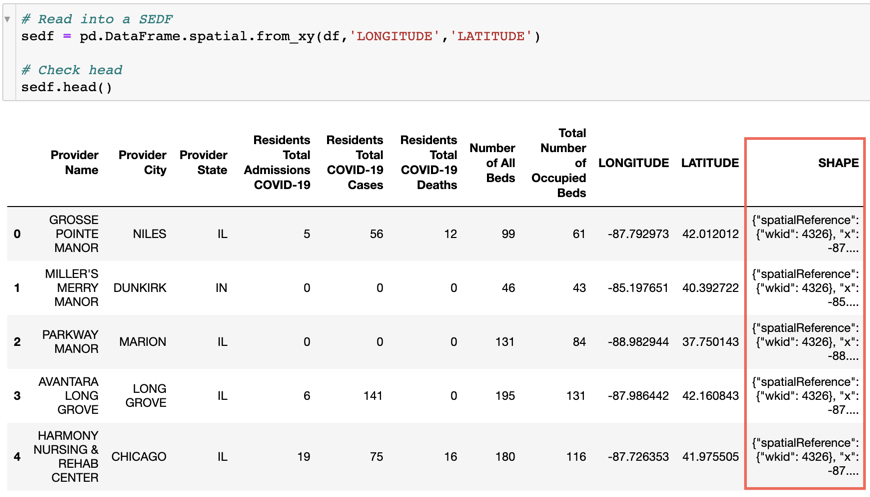

### Custom Namespaces

The [__GeoAccessor__](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#geoaccessor) and the [__GeoSeriesAccessor__](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#geoaccessor) classes, from the [`arcgis.features`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#module-arcgis.features) module, add two custom namespaces to a given Pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) or a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series). The _GeoAccessor_ class adds `spatial` namespace to the DataFrame and the _GeoSeriesAccessor_ class adds `geom` namespace to the Series.

By adding custom namespaces, we [extend](https://pandas.pydata.org/pandas-docs/stable/development/extending.html) the capabilities of Pandas to allow for spatial operations using various geometry objects. The different geometry objects supported by these namespaces are:

 - Point
 - Polyline
 - Polygon
 
You can learn more about these geometry objects in our [Working with Geometries](https://developers.arcgis.com/python/guide/part2-working-with-geometries/) guide series.

#### The `spatial` namespace

The `spatial` namespace allows us to performs spatial operations on a given Pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame). The namespace provides:
- Dataset level operations
- Dataset information
- Input/Output operations


The spatial namespace can be accessed using the `.spatial` _accessor_ pattern. E.g.: 

a. The centroid of a dataframe can be retrieved using the [`centroid`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.centroid) property. 

```python
>>> df.spatial.centroid
```
 
b. The [`plot()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.plot) method can be used to draw the data on a web map.

```python
>>> df.spatial.plot()
```

#### The `geom` namespace

The `geom` namespace enables spatial operations on a given Pandas [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series). The namespace is accessible using the `.geom` _accessor_ pattern. E.g.:

a. The [`area`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoSeriesAccessor.area) method can be used to retrieve the Feature object’s area.

```python
>>> df.SHAPE.geom.area
```
    
b. The [`buffer()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoSeriesAccessor.buffer) method can be used to constructs a Polygon at a specified distance from the Geometry object.

```python
>>> df.SHAPE.geom.buffer()
```    

__Note__ that `geom` accessor operates on a series of data type "_geometry_". The `SHAPE` column of a SeDF is of _geometry_ data type. 

#### Importing namespaces

_GeoSeriesAccessor_ and _GeoAccessor_ classes are similar to [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) and [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) objects. However, you do not work with them directly. Instead, you import them right after you import Pandas as shown in the snippet below. Importing these classes registers the spatial functionality with Pandas and allows you to start performing spatial operations on your DataFrames.

You may import the classes as follows:


```python
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
```

### Geometry Engines

The ArcGIS API for Python uses either [`shapely`](https://pypi.org/project/Shapely/) or [`arcpy`](https://www.esri.com/en-us/arcgis/products/arcgis-python-libraries/libraries/arcpy) as back-ends (engines) for processing geometries. The API is identical no matter which engine you use. However, at any point in time, only one engine will be used. 

[__ArcPy__]((https://www.esri.com/en-us/arcgis/products/arcgis-python-libraries/libraries/arcpy)) provides a useful and productive way to perform geographic data analysis, data conversion, data management, and map automation with Python. With `arcpy` as the geometry engine, you can read/write different file types, perform various geometric operations and do a lot more without needing multiple other third-party packages that perform such operations. 


By default, the ArcGIS API for Python looks for `arcpy` as the geometry engine. In the absence of `arcpy`, it looks for `shapely`. The ArcGIS API for Python integrates the [Shapely](https://pypi.org/project/Shapely/), [Fiona](https://pypi.org/project/Fiona/), and [PyShp](https://pypi.org/project/pyshp/) packages so that spatial data from other sources can be accessed through the API. This makes it easier to use the ArcGIS API for Python and work with geospatial data regardless of the platform used. However, we recommend using `arcpy` for better accuracy and support for a wider gamut of data sources. Here is a one-line overview of each of these packages:

 - [Shapely](https://pypi.org/project/Shapely/) is used for the manipulation and analysis of geometric objects. 
 - [Fiona](https://pypi.org/project/Fiona/) can read and write real-world data using multi-layered GIS formats, including Esri File Geodatabase. It is often used in combination with Shapely so that Fiona is used for creating the input and output, while Shapely does the data wrangling part. 
 - [PyShp](https://pypi.org/project/pyshp/) is used for reading and writing ESRI shapefiles.

<div class="alert alert-info">
    <b>Note:</b> In the absence of <code>arcpy</code>, the ArcGIS API for Python looks for a <code>shapely</code> geometry engine. To allow for a seamless experience, both <a href="https://pypi.org/project/Shapely/">Shapely</a> and <a href="https://pypi.org/project/Fiona/">Fiona</a> packages must be present in your current conda environment. If these packages are not installed, you may install them using <code>conda</code> as follows:
    
    conda install shapely
    conda install fiona
</div>

It could be that both `arcpy` and `shapely` are __not__ present in your current environment. In such a scenario, the number of spatial operations you could perform using SeDF will be extremely limited. The cell below shows how to easily detect the current geometry engine in your environment.

In [1]:
import imp
try:
    if imp.find_module('arcpy'):
        print("Has arcpy")
    elif imp.find_module('shapely'):
        print("Has shapely")
    elif imp.find_module('arcpy') and imp.find_module('shapely'):
        print("Has both arcpy and shapely")
except:
    print("Does not have either arcpy or shapely")

Has arcpy


So far, we have gone through some of the basics of __Spatially enabled DataFrame__. Now, it's time to see the `spatial` and `geom` namespaces in action. Let's look at a quick example.

## Quick Example

Let's look at a quick example showcasing the `spatial` and `geom` namespaces at work. We will start with a common use case of importing the data from a csv file. 

In this example, we will:

- read the data with location information from a csv file into a Pandas DataFrame
- create a SeDF from the Pandas DataFrame
- check some properties of the SeDF
- apply spatial operations on the geometry column using the `geom` accessor
- plot the SeDF on a map

__Data:__ We will use the Covid-19 data for Nursing Homes in the U.S. to illustrate this example. The data has 124 records and 10 columns.

__Note:__ the dataset used in this example is a subset of [Covid-19 Nursing Home data](https://data.cms.gov/Special-Programs-Initiatives-COVID-19-Nursing-Home/COVID-19-Nursing-Home-Dataset/s2uc-8wxp) and has been curated for illustration purposes. The complete dataset is available at the Centers for Medicare & Medicaid Services ([CMS](https://www.cms.gov/)) website.

In [2]:
# Import Libraries

import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS
from IPython.display import display

In [3]:
# Create an anonymous GIS Connection
gis = GIS()

### Get Data

In [4]:
# Read the data
df = pd.read_csv('../data/sample_cms_data.csv')

# Return the first 5 records
df.head()

,Provider Name,Provider City,Provider State,Residents Total Admissions COVID-19,Residents Total COVID-19 Cases,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,LONGITUDE,LATITUDE
0,GROSSE POINTE MANOR,NILES,IL,5,56,12,99,61,-87.792973,42.012012
1,MILLER'S MERRY MANOR,DUNKIRK,IN,0,0,0,46,43,-85.197651,40.392722
2,PARKWAY MANOR,MARION,IL,0,0,0,131,84,-88.982944,37.750143
3,AVANTARA LONG GROVE,LONG GROVE,IL,6,141,0,195,131,-87.986442,42.160843
4,HARMONY NURSING & REHAB CENTER,CHICAGO,IL,19,75,16,180,116,-87.726353,41.975505


In [5]:
# Check Shape
df.shape

(124, 10)

The dataset contains 124 records and 10 columns. Each record represents a nursing home in the states of Indiana and Illinois. Each column contains information about the nursing home such as:

- Name of the nursing home, its city and state
- Details of resident Covid cases, deaths and number of beds
- Location of nursing home as Latitude and Longitude

### Create a SeDF

A Spatially enabled DataFrame can be created from any Pandas DataFrame with location information (Latitude and Longitude) using the [`from_xy()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.from_xy) method of the `spatial` namespace.

In [6]:
# Read into a SeDF
sedf = pd.DataFrame.spatial.from_xy(df=df, x_column='LONGITUDE', y_column='LATITUDE', sr=4326)

# Check head
sedf.head()

,Provider Name,Provider City,Provider State,Residents Total Admissions COVID-19,Residents Total COVID-19 Cases,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,LONGITUDE,LATITUDE,SHAPE
0,GROSSE POINTE MANOR,NILES,IL,5,56,12,99,61,-87.792973,42.012012,"{""spatialReference"": {""wkid"": 4326}, ""x"": -87...."
1,MILLER'S MERRY MANOR,DUNKIRK,IN,0,0,0,46,43,-85.197651,40.392722,"{""spatialReference"": {""wkid"": 4326}, ""x"": -85...."
2,PARKWAY MANOR,MARION,IL,0,0,0,131,84,-88.982944,37.750143,"{""spatialReference"": {""wkid"": 4326}, ""x"": -88...."
3,AVANTARA LONG GROVE,LONG GROVE,IL,6,141,0,195,131,-87.986442,42.160843,"{""spatialReference"": {""wkid"": 4326}, ""x"": -87...."
4,HARMONY NURSING & REHAB CENTER,CHICAGO,IL,19,75,16,180,116,-87.726353,41.975505,"{""spatialReference"": {""wkid"": 4326}, ""x"": -87...."


> We can see that a new `SHAPE` column has been added while creating a SeDF.

Let's look at the detailed information of the DataFrame.

In [7]:
# Check info
sedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Provider Name                        124 non-null    object  
 1   Provider City                        124 non-null    object  
 2   Provider State                       124 non-null    object  
 3   Residents Total Admissions COVID-19  124 non-null    int64   
 4   Residents Total COVID-19 Cases       124 non-null    int64   
 5   Residents Total COVID-19 Deaths      124 non-null    int64   
 6   Number of All Beds                   124 non-null    int64   
 7   Total Number of Occupied Beds        124 non-null    int64   
 8   LONGITUDE                            124 non-null    float64 
 9   LATITUDE                             124 non-null    float64 
 10  SHAPE                                124 non-null    geometry
dtypes: float64(2), geom

> Here, we see that the `SHAPE` column is of _geometry_ data type.

### Check Properties of a SeDF
We just created a SeDF. Let's use the `spatial` namespace to check some properties of the SeDF.

In [8]:
# Check geometry type
sedf.spatial.geometry_type

['point']

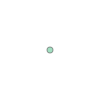

In [9]:
# Visualize geometry
sedf.SHAPE[0]

> The geometry_type tells us that our dataset is point data.

In [10]:
# Get true centroid
sedf.spatial.true_centroid

(-87.16989602419355, 40.383302290322575)

> Retrieves the true centroid of the DataFrame.

In [11]:
# Get full extent
sedf.spatial.full_extent

(-90.67644, 37.002806, -84.861849, 42.380225)

> Retrieves the extent of the data in our DataFrame.

### Apply spatial operations using `.geom`

Let's use the `geom` namespace to apply spatial operations on the geometry column of the SeDF.

#### Add buffers
We will use the [`buffer()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoSeriesAccessor.buffer) method to create a 2 unit buffer around each nursing home and add the buffers as a new column to the data. 

In [12]:
# Create buffer
sedf['buffer_2'] = sedf.SHAPE.geom.buffer(distance=2)

In [13]:
# Check head
sedf['buffer_2'].head()

0    {"curveRings": [[[-87.792973, 44.012012], {"a"...
1    {"curveRings": [[[-85.197651, 42.392722], {"a"...
2    {"curveRings": [[[-88.982944, 39.750143], {"a"...
3    {"curveRings": [[[-87.986442, 44.160843], {"a"...
4    {"curveRings": [[[-87.726353, 43.975505], {"a"...
Name: buffer_2, dtype: geometry

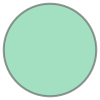

In [14]:
# Visualize a buffer geometry
sedf['buffer_2'][0]

> We can see that the buffers created are of _geometry_ data type.

In [15]:
# Get area
sedf.buffer_2.geom.area

0      12.566371
1      12.566371
2      12.566371
3      12.566371
4      12.566371
         ...    
119    12.566371
120    12.566371
121    12.566371
122    12.566371
123    12.566371
Name: area, Length: 124, dtype: object

> The `area` property retrives the area of each buffer in the units of the DataFrame's spatial reference.

Now that we have created a new `buffer_2` column, our data should have two columns of _geometry_ data type i.e. `SHAPE` and `buffer_2`. Let's check.

In [16]:
# Check info
sedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Provider Name                        124 non-null    object  
 1   Provider City                        124 non-null    object  
 2   Provider State                       124 non-null    object  
 3   Residents Total Admissions COVID-19  124 non-null    int64   
 4   Residents Total COVID-19 Cases       124 non-null    int64   
 5   Residents Total COVID-19 Deaths      124 non-null    int64   
 6   Number of All Beds                   124 non-null    int64   
 7   Total Number of Occupied Beds        124 non-null    int64   
 8   LONGITUDE                            124 non-null    float64 
 9   LATITUDE                             124 non-null    float64 
 10  SHAPE                                124 non-null    geometry
 11  buffer_2           

#### Calculate distance
Let's calculate the distance from one nursing home to another. We will use the [`distance_to()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoSeriesAccessor.distance_to) method to calculate distance to a given geometry.

In [17]:
# Calculate distance to the first nursing home
sedf.SHAPE.geom.distance_to(sedf.SHAPE[0])

0           0.0
1      3.059052
2      4.424879
3      0.244092
4      0.075967
         ...   
119    0.462069
120    0.116743
121    2.951358
122    0.144996
123    4.055468
Name: distance_to, Length: 124, dtype: object

We just performed some spatial operations on a pandas Series (`SHAPE`) using the `geom` namespace. Now, let's perform some basic Pandas operations on SeDF.

### Perform Pandas Operations on a SeDF

Let's perform some basic Pandas operations on a SeDF. One of the benefits of the accessor pattern in SeDF is that the SeDF object is of type _DataFrame_. Thus, you can continue to perform regular Pandas DataFrame operations. We will:
- Check the count of records for each state in our data
- Remove records that have 0 cases and death values
- Create a scatter plot of cases and deaths

In [18]:
# Check record count for each state
sedf['Provider State'].value_counts()

IN    67
IL    57
Name: Provider State, dtype: int64

In [19]:
# Remove records with no cases and deaths
new_df = sedf.query('`Residents Total COVID-19 Cases` != 0 & \
                    `Residents Total COVID-19 Deaths` != 0').copy()
new_df.head()

,Provider Name,Provider City,Provider State,Residents Total Admissions COVID-19,Residents Total COVID-19 Cases,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,LONGITUDE,LATITUDE,SHAPE,buffer_2
0,GROSSE POINTE MANOR,NILES,IL,5,56,12,99,61,-87.792973,42.012012,"{""spatialReference"": {""wkid"": 4326}, ""x"": -87....","{""curveRings"": [[[-87.792973, 44.012012], {""a""..."
4,HARMONY NURSING & REHAB CENTER,CHICAGO,IL,19,75,16,180,116,-87.726353,41.975505,"{""spatialReference"": {""wkid"": 4326}, ""x"": -87....","{""curveRings"": [[[-87.726353, 43.975505], {""a""..."
6,HARCOURT TERRACE NURSING AND REHABILITATION,INDIANAPOLIS,IN,2,1,1,110,66,-86.193469,39.904128,"{""spatialReference"": {""wkid"": 4326}, ""x"": -86....","{""curveRings"": [[[-86.193469, 41.904128], {""a""..."
7,GREENCROFT HEALTHCARE,GOSHEN,IN,3,65,13,153,155,-85.817798,41.561063,"{""spatialReference"": {""wkid"": 4326}, ""x"": -85....","{""curveRings"": [[[-85.817798, 43.561063], {""a""..."
8,"WATERS OF MARTINSVILLE, THE",MARTINSVILLE,IN,2,33,8,103,44,-86.432593,39.407438,"{""spatialReference"": {""wkid"": 4326}, ""x"": -86....","{""curveRings"": [[[-86.432593, 41.407438], {""a""..."


In [20]:
# Check shape
new_df.shape

(37, 12)

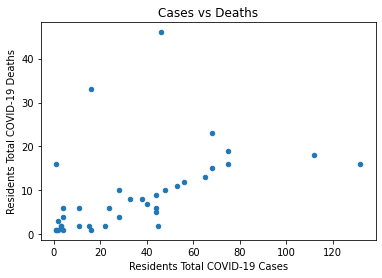

In [21]:
# Plot cases and deaths
new_df.plot('Residents Total COVID-19 Cases',
            'Residents Total COVID-19 Deaths', 
             kind='scatter',
             title = "Cases vs Deaths");

We just saw how easy it was to perform some Pandas data selection and manipulation operations on a SeDF... piece of cake! Now, let's plot the complete data on a map. 

__Note__ - If you would like to learn more about Pandas and data engineering with Pandas, checkout our [Data Engineering primer guide part-3](https://developers.arcgis.com/python/guide/part3-introduction-to-pandas/).

### Plot on a Map

We will use the [`plot()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.plot) method of the `spatial` namespace to plot the SeDF on a map.


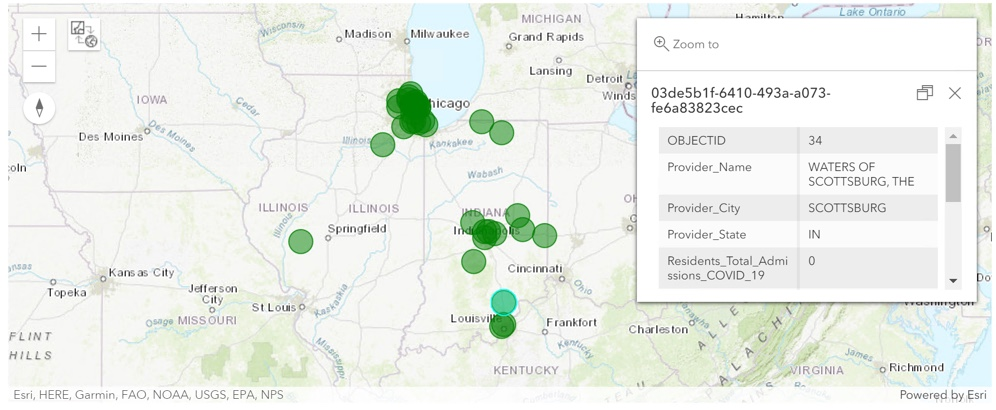

In [24]:
# Create Map
m1 = gis.map('IL, USA', 6)
m1

> Points displayed on the map show location of each nursing home in our data with at-least 1 case and 1 death. Clicking on a point displays attribute information for that nursing home.

In [23]:
# Plot SeDF on a map
new_df.spatial.plot(m1)

True

With __Spatially enabled DataFrame__, you can now perform a variety of geospatial operations such as creating buffers, calculating the distance to another geometry or plotting your data on a map, and rendering it using various renderers. While you are at it, you can continue to perform various operations on the DataFrame using Pandas or other open-source libraries such as Seaborn, Scikit-learn, etc. Isn't that exciting!

## Conclusion

A [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) is a fundamental [Pandas](https://pandas.pydata.org/) data structure and a building block for performing various scientific computations in Python. In this part of the guide series, we introduced the concept of [__Spatially enabled DataFrame__](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#geoaccessor) (__SeDF__) and how it adds "spatial" abilities to a Pandas DataFrame or Series. We also discussed the custom namespaces and geometry engines that operate behind the scenes and allow us to perform spatial operations. You have also seen an end-to-end example of using SeDF to perform various spatial operations along with Pandas operations.

In the next part of this guide series, you will learn about creating a SeDF using GIS data in various formats.

<div class="alert alert-info">
    <b>Note:</b> Given the importance and popularity of <i>Spatially enabled DataFrame</i>, we are revisiting our documentation for this topic. Our goal is to enhance the existing documentation to showcase the various capabilities of Spatially enabled DataFrame in detail with even more examples this time. 

   Creating quality documentation is time-consuming and exhaustive but we are committed to providing you with the best experience possible. With that in mind, we will be rolling out the revamped guides on this topic as different parts of a guide series (like the <a href="https://developers.arcgis.com/python/guide/part1-introduction-to-dataengineering/">Data Engineering</a> or <a href="https://developers.arcgis.com/python/guide/part1-introduction-what-is-geometry/">Geometry</a> guide series). This is "part-1" of the guide series for Spatially enabled DataFrame. You will continue to see the existing documentation as we revamp it to add new parts. Stay tuned for more on this topic.
</div>